In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("car_evaluation.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.shape

(1727, 7)

In [5]:
df.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df['unacc'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [8]:
df['unacc'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64

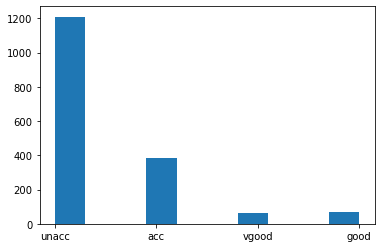

In [9]:
import matplotlib.pyplot as plt
plt.hist(df['unacc'])
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   vhigh    1727 non-null   int64
 1   vhigh.1  1727 non-null   int64
 2   2        1727 non-null   int64
 3   2.1      1727 non-null   int64
 4   small    1727 non-null   int64
 5   low      1727 non-null   int64
 6   unacc    1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [12]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc_train = accuracy_score(y_train, classifier1.predict(X_train))
acc_test = accuracy_score(y_test, classifier1.predict(X_test))

conf_train = confusion_matrix(y_train, classifier1.predict(X_train))
conf_test = confusion_matrix(y_test, classifier1.predict(X_test))

In [17]:
print("Accuracy of training data: ", acc_train)
print("Accuracy of testing data: ", acc_test)

Accuracy of training data:  0.9444015444015444
Accuracy of testing data:  0.8796296296296297


In [18]:
print("Confusion Matrix of Training Sample:\n\n",conf_train)

Confusion Matrix of Training Sample:

 [[253   3  32   0]
 [ 18  32   1   0]
 [  3   0 908   0]
 [ 13   0   2  30]]


In [19]:
print("Confusion Matrix of Testing Sample:\n\n",conf_test)

Confusion Matrix of Testing Sample:

 [[ 68   1  27   0]
 [  7   8   3   0]
 [  2   0 296   0]
 [  8   0   4   8]]


In [20]:
from collections import Counter
from imblearn.over_sampling import SMOTE

before_balance_counter = Counter(y)

oversample = SMOTE()
X2, y2 = oversample.fit_resample(X, y)
counter = Counter(y2)

In [21]:
print(before_balance_counter)

Counter({2: 1209, 0: 384, 1: 69, 3: 65})


In [22]:
print(counter)

Counter({2: 1209, 0: 1209, 3: 1209, 1: 1209})


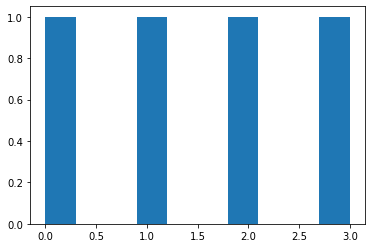

In [23]:
plt.hist(counter)
plt.show()

In [24]:
nX_train, nX_test, ny_train, ny_test = train_test_split(X2, y2, random_state=1)

In [25]:
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(nX_train, ny_train)

KNeighborsClassifier()

In [26]:
nacc_train = accuracy_score(ny_train, classifier2.predict(nX_train))
nacc_test = accuracy_score(ny_test, classifier2.predict(nX_test))

nconf_train = confusion_matrix(ny_train, classifier2.predict(nX_train))
nconf_test = confusion_matrix(ny_test, classifier2.predict(nX_test))

In [27]:
print("Accuracy of training data: ", nacc_train)
print("Accuracy of testing data: ", nacc_test)

Accuracy of training data:  0.9398952302178109
Accuracy of testing data:  0.8924731182795699


In [28]:
print("Confusion Matric of Training Sample:\n\n",nconf_train)

Confusion Matric of Training Sample:

 [[852  29   2  14]
 [  0 908   0   1]
 [ 78  54 751  34]
 [  6   0   0 898]]


In [29]:
print("Confusion Matric of Testing Sample:\n\n",nconf_test)

Confusion Matric of Testing Sample:

 [[264  29   1  18]
 [  0 299   0   1]
 [ 44  20 212  16]
 [  1   0   0 304]]
